Кажется ни один другой исследователь в области deep learning не может похвастаться таким разнообразием научных достижений, как Йошуа Бенжио. При его участии создавалось почти все, что сейчас активно используется: CNN, seq2seq RNN, GAN, механизм внимания, перенос обучения, автокодировщики и прочее. Теперь Бенжио решил взяться за создание нейронных сетей, способных рассуждать "по-человечески".

Данная статья является первой в серии работ, посвященных этой теме, следом за ней идет более объемная статья "[Inductive Biases for Deep Learning of Higher-Level Cognition](https://arxiv.org/abs/2011.15091)" (A. Goyal, Y. Bengio, 2020), обзор на которую я напишу в дальнейшем.

### Inductive priors

Как известно, машинное обучение - есть обучение на данных. Для этого используется некий обучаемый алгоритм (learner). Результатом обучения является предиктор. В случае нейронных сетей learner - это архитектура и процесс обучения, а предиктор - обученная нейросеть. В процессе обучения learner учится выводить общие закономерности из частных случаев, что в логике называется индукцией, а в ML - обобщением (генерализацией).

Понятие **inductive priors** можно перевести как "априорные гипотезы индукции", то есть предварительные гипотезы о свойствах исследуемой зависимости. Например, в задачах анализа изображений предварительными знаниями является инвариантность к сдвигам, масштабированию, поворотам (хотя в некоторых случаях это может не выполняться), а также локальность: близкие точки на изображении более связаны по смыслу, чем далекие друг от друга. Такие гипотезы должны быть заложены в обучаемый алгоритм - они помогут ему достичь большей степени генерализации на меньшем количестве обучаемых примеров. Например, в сверточные сети заложена инвариантность (точнее эквивариатность) к сдвигам и локальность - за счет этого они эффективнее полносвязных.

Более подробно об этих темах я писал в статье [No-Free-Lunch теорема и важность априорных гипотез в машинном обучении]($No-Free-Lunch теорема и важность априорных гипотез в машинном обучении$).

**Как это связано с сознанием?** Представим, что у нас есть "базовый" и "более интеллектуальный" обучаемые алгоритмы. Имея *одни и те же данные* (датасеты с изображениями, корпусы текста) более интеллектуальный алгоритм достигает на них большей степени обобщения, чем базовый алгоритм. Это означает, что *более интеллектуальный алгоритм способен лучше учиться*, и в этом могут помочь заложенные в него априорные гипотезы о том, как следует делать выводы. Одной из таких гипотез и посвящена данная статья, что отражено в ее названии.

### Моделирование сознания

Автор основывается на современной теории сознания, называемой теорией глобального рабочего пространства (global workspace theory: [1988](https://www.sscnet.ucla.edu/comm/steen/cogweb/Abstracts/Baars_88.html), [1997](http://bernardbaars.pbworks.com/f/Baars%25252BTheater%25252Bbook%25252BCh%25252B1-2.pdf), [2001](https://www.researchgate.net/publication/12165996_Towards_a_Cognitive_Neuroscience_of_Consciousness_Basic_Evidence_and_a_Workspace_Framework), [2002](https://www.researchgate.net/publication/11511046_The_Conscious_Access_Hypothesis_Origins_and_Recent_Evidence), [2017](https://www.researchgate.net/publication/349263251_What_Is_Consciousness_and_Could_Machines_Have_It)) и предлагает на ее основе модификацию нейронных сетей, которая сделает их способными рассуждать сознательно. Автор следует подходу, описанному в книге Даниела Канемана [Thinking, Fast and Slow](https://en.wikipedia.org/wiki/Thinking,_Fast_and_Slow) (2011), и разделяет мышление на бессознательное (system 1) и сознательное (system 2).

**Бессознательное мышление** Канеман описывает как "быстрое, интуитивное и (иногда) эмоциональное". Например, интуинивным мышлением мы определяем, чье лицо видим перед собой. Интуитивным мышлением мы балансируем тело при ходьбе. То есть этот тип мышления помогает нам осуществлять низкоуровневое восприятие и низкоуровневые действия. Также к этому типу мышления относится интуиция, когда мы что-то предполагаем, но не вполне можем объяснить почему. Бессознательное мышление работает быстро и оперирует большим объемом информации, но его трудно облечь в словесную форму.

**Сознательное мышление**  Канеман описывает как "более медленное, взвешенное и логичное". В нем принимают участие высокоуровневые переменные (абстракции), которые как правило могут быть выражены в виде словесных понятий. Каждая сознательная мысль использует лишь несколько абстракций, то есть вся цепочка мыслей представляет собой разреженный граф. Согласно Бенжио, с точки зрения теории вероятностей совместное распределение всех возможных абстракций представляет собой разреженный граф зависимостей между ними (как в байесовских сетях, на которые я делал [обзор]($Bayesian networks$)).

Согласно Бенжио, современные нейронные сети реализуют бессознательное мышление. В них информация протекает напрямую от сенсорного восприятия к выводам и действиям, и промежуточные представления практически не интерпретирумы. Бенжио предлагает явно разделить нейронную сеть на бессознательную (сенсорную) часть и сознательную часть, работающую с высокоуровневыми концепциями и памятью.

> Instead of making predictions in the sensory (e.g. pixel) space, one can thus make predictions in this high-level
abstract space, which do not have to be limited to just the next time step but can relate events far away
from each other in time.

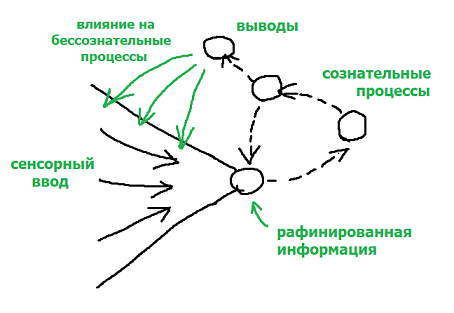

Конечно, человеческое сознание имеет и другие аспекты (такие как самоосознание), которые в данной статье не рассматриваются. Бенжио ставит своей целью формализацию процесса сознательного мышления, определение тех преимуществ, которые сознательное мышление можеть дать обучаемому агенту и способ проверить эти теории экспериментом. 

**Одним из ожидаемых премуществ должна стать стать высокая степень out-of-distribution генерализации**, то есть хорошая точность работы на тех *типах* примеров, которые не встречались при обучении или встречались редко. Это означает устойчивость к проблеме сдвига ковариаты (covariate shift; см. например [эту статью](https://arxiv.org/abs/2107.07455) и связанное с ней [соревнование от Яндекса](https://research.yandex.com/shifts)).

### Дополнение от автора обзора

Идея о том, что современные нейронные сети реализуют бессознательное знание, выглядит правдоподобной, однако все же это не вполне доказано. Во-первых, если воспринимать отдельные нейроны (или фильтры в CNN) как суждения, то мы имеем плотный граф зависимостей между ними. Это конечно наводит на мысль о скорее бессознательном, интуитивном мышлении (об этом см. также обзор статьи [Intriguing properties of neural networks]($Intriguing properties of neural networks$)). Однако возможно в качестве отдельных "мыслей" следует рассматривать не отдельные нейроны, а паттерны активации нейронов. Если тщательно выбирать такие паттерны, то они вполне могут оказаться словесно интерпретируемыми, а граф зависимостей между ними разреженным. Просто нейронная сеть, условно говоря, не "выставляет эти паттерны напоказ", поскольку не было соответствующего training objective, а прячет где-то в глубине своей структуры. Это конечно тоже лишь предположение. Я не особенно верю в то, что оно верно, но и обратное не доказано.

Во-вторых, согласно статье, нейронные сети в основном обрабатывают низкоуровневую информацию:

> System 1 tasks align well with the current successful applications of deep learning, e.g., low-level
perception <...> and intuitive knowledge <...>, i.e., knowledge which is difficult to verbalize

Но нужно помнить о том, что работающие с текстом нейронные сети принимают на вход напрямую высокоуровневые концепции, выраженные в языке. Я неоднократно слышал утверждение о том, что сети наподобие GPT-3 "на самом деле не понимают" смысла понятий, а лишь вычисляют статистические закономерности и "собирают из слов конструктор". Однако именно в языке выражено наше высокоуровневное, сознательное мышление. Почему нейронная сеть не может его перенять, работая со статистическими зависимостями, найденными в текстах? Словом, по-моему к подобным спекуляциям нужно относиться скептически и рассматривать разные варианты.

### Принципиальная схема предлагаемой архитектуры

Бенжио предлагает строить сознательно функционирующую сеть по следующей схеме:

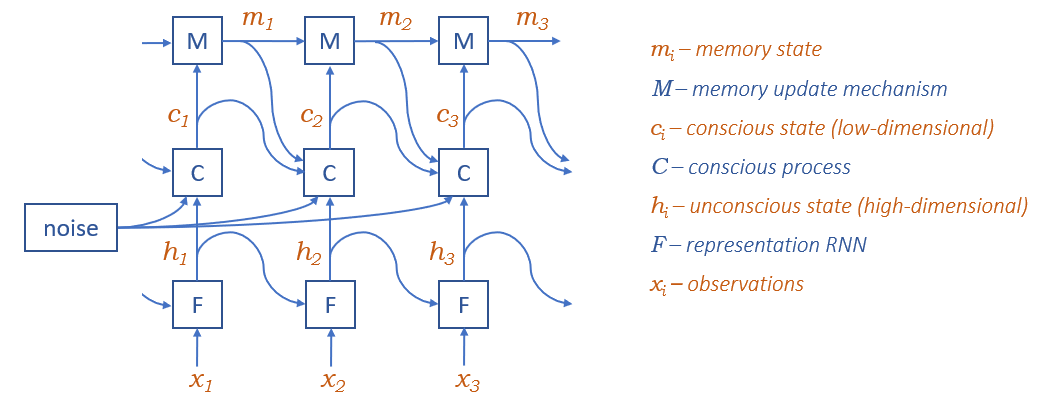

Вектор $h_t$ - внутреннее представление, извлеченные из входной последовательности $x_t$ неким алгоритмом, например RNN-энкодером $F$. Вектор $h_t$ имеет большую размерность и является "бессознательным" внутренним представлением.

$h_t = F(x_t, h_{t-1})$

Соответственно, $h_t$ содержит большой объем информации, из которой в сознательную часть сети должна попасть лишь небольшая доля информации. Функция $C$ анализирует вектор $h_t$, принимая во внимание предыдущее сознательное состояние $C_{t-1}$, содержимое памяти $m_{t-1}$, также функционирование $C$ согласно автору должно содержать элемент случайности, то есть использовать источник случайного шума $z_t$. Результатом является следующее сознательное состояние:

$c_t = C(h_t, c_{t-1}, m_{t-1}, z_t)$

Здесь важно отметить, что зависимость $c_t$ от $h_t$ должна быть реализована как простой механизм внимания, который выбирает некоторые конкретные элементы вектора $h_t$.

Память обновляется функцией $M$, обновляющей содержимое памяти с использованием текущего сознательного состояния:

$m_t = M(M_{t-1}, c_t)$

Данная схема конечно упрощена. Реалистичный агент должен иметь цели, которые влияют как на выбор наиболее релевантных деталей из общей массы информации, так и на рассуждения. Также очевидно, что в мозге существуют разные типы памяти (кратковременная, долговременная).

Конечно, просто собрав архитектуру нейронной сети по описанной схеме мы не получим желаемого результата. Если мы прость создадим слои $C$ и $M$ с мыслью о том, что они должны отвечать за сознание и память, то это еще не означает, что в обученной сети они будут играть именно эти роли. Нам нужно как-то еще поспособствовать этому.

### Разреженный факторный граф

Пусть мы рассматриваем некое совместное распределение переменных $S = \{V_1, \ldots, V_n\}$. Пусть $P(S)$ - их совместное рпспределение. В факторном графе $P(S)$ представляется в виде произведения так называемых потенциальных функций (факторов) $f_i$, каждая из которых зависит только от небольшого подмножества $S_j \subset S$:

$P(S) = \cfrac{1}{Z} \prod_j f_j(S_j)$

Здесь $Z$ - константа нормализации. Фактор $f_j$ обозначают непосредственную связь между переменными из $S_j$.

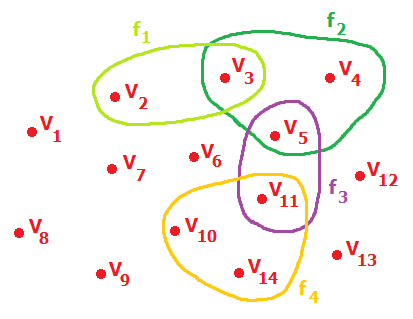

Главная гипотеза статьи (собственно **consciousness prior**) заключается в том, что совместное распределение элементов вектора $h_t$ факторизуемо таким образом.

> The consciousness prior amounts to the assumption that the factor
graph for the joint distribution between the elements in the set $h_t$ (or more generally for the set containing
all of the elements in $m_t$ and all those one could think of in the future) is sparse.

Это предположение мотивировано структурой языка, в которой каждая фраза связывает либо небольшое число слов (абстракций), а также структурой формальных систем представления знаний (онтологий, экспертных систем). Еще одно сопутствующее предположение состоит в том, что каждый фактор $f_j$ описывает сильную связь.

> We believe that a related assumption can be made: most factors in
the graph describe a strong dependency, i.e., one which makes low-entropy predictions (e.g. about some
of the variables in $S_j$ given the others).

Давайте вернемся к описанию схемы сети и вспомним важную деталь:

> Зависимость $c_t$ от $h_t$ должна быть реализована как простой механизм внимания, который выбирает некоторые конкретные элементы вектора $h_t$.

Мы предположили, что совместное распределение элементов вектора $h_t$ факторизуемо в виде набора взаимосвязей $f_i$, связывающих лишь небольшое число элементов. Сознательный процесс $C$ как раз и реализует эти взаимосвязи, выбирая некоторые элементы из $h_t$ и делая выводы о других элементах $h_t$ в следующий момент времени.

С точки зрения машинного обучения реализация такого свойства (в виде каких-то ограничений или добавления слагаемых в функцию потерь) должно помочь обучить RNN-энкодер, который извлекает осмысленные абстракции (наподобие тех, что можно описать словами).

> In the quest to discover encoding functions which disentangle high-level concepts from each other, we should see the
consciousness prior as one of many tools to constrain the learner towards better high-level representations.

### Функции потерь (training objectives)

Реализации описанной выше структуры сети и свойства разреженности может быть недостаточно. Сеть может научиться просто игнорировать сознательный процесс ($C$) или же он будет реализовывать некое подобие тождественного преобразования. Значит нам нужно что-то еще.

Мы можем дополнить сеть блоком верификации, который будет сопоставлять текущий вектор представлений $h_t$ с одним из предыдущих сознательных состояний $c_{t-k}$ и возвращать число, означающее степень достоверности предсказаний, сделанных на основе $c_{t-k}$:

$V(h_t, c_{t-k}) \in \mathbb{R}$

Как показывалось в предыдущем разделе, сознательный процесс $C$ реализует факторизацию совместного распределения элементов $h_t$, то есть позволяет предсказывать набор элементов $B$ исходя из значений набора элементов $A$. Если мы хотим увеличить качество таких предсказаний, то мы могли бы максимизировать вероятность $\log P(A|B)$.

> We may just want to maximize $\log P(A|B)$ or some proxy for it, e.g., using a variational
auto-encoder objective or a conditional GAN if one wants to sample accurately an $A$ from $B$. <...> Note that such an objective function is not just
used to learn the mapping from B to A, but also drives the learning of the representation function itself, i.e., is back-propagated into the representation RNN.
<...> If that was the driving objective for attention, the learner would always pick a pair
(A, B) such that A is trivially predictable from B.

Таким образом, нужно чтобы $B$ не предсказывалось тривиально исходя из $A$, поэтому вопрос выбора функции $V$ остается открытым.

### Именованные переменные

Бенжио предлагает модификацию механизма внимания, отображающую $h_t$ в $c_t$, так чтобы в $c_t$ приходила информация не только о взвешенной сумме элементов $h_t$ (как в обычном внимании), но и о том, какие именно элементы взяты. То есть идея заключается в передаче между $h_t$ и $c_t$ пар (ключ, значение). Ключ означает имя переменной. Если $h_t$ и $c_{t-k}$ представляют собой словари с парами (имя, значение), то функция $V$ может сопоставлять предсказания из $c_{t-k}$ с фактами из $h_t$, сравнивая переменные с одинаковыми именами.

Ключ также может содержать информацию о типе переменной, об этом Бенжио пишет следующее:

> Another reason to represent
keys separately from values is that the keys can be used to represent a form of type information, to help
match the expected argument type of a downstream computation with an appropriate element selected by
an attention mechanism. This is important in order to obtain systematic generalization [[Lake and Baroni,
2017](https://arxiv.org/abs/1711.00350)] and combinatorial properties omnipresent in natural language, making it easier to combine different
pieces of neural hardware together dynamically, with keys being used to decide which information should
be routed where. We could thus see the conscious state as a bottleneck to route such information across
many different modules.

### Связь с естественным языком и формальным представлением знаний

Все описанное выше позволяет предположить, что должно существовать простое преобразование сознательного состояния $c_t$ в вербальную форму, и наоборот фраза может быть преобразована в сознательное состояние, хотя сознательное состояние в целом богаче фразы, и перевод во фразу может привести к частичной потере информации (так как некоторые мысли сложно выразить словесно). Добавлением дополнительных слагаемых к функции потерь мы можем "подталкивать" сеть к возможности преобразования $c_t$ во фразу и наоборот.

Также можно предположить, что язык позволил людям строить более явные и строгие внутренние представления для различных абстракций (sharper internal representations). Быть может, появление способности общаться друг с другом и сделало первобытных людей более разумными?

Наконец, Бенжио рассуждает о потенциальной возможности нейронных сетей оперировать формальной логикой с помощью предложенных выше схем. Формальная логика обычно оперирует набором фактов и зависимостей, выводящих одни факты из других. Это очень похоже на описанную в данной статье функцию $C$, извлекающую и обрабатывающую сознательное состояние низкой размерности. Однако Бенжио предполагает, что будущие успехи будут скорее связаны не с сочетанием нейронных сетей и формальной логики, а с нейронными сетями, дополненными механизмом внимания, с помощью которого выделяются важные факты и на их основе строятся рассуждения, как описано в данной статье.

> However, pasting symbolic logic computations on top of a deep learning
encoder might not succeed for several reasons. This would lose the ability manipulate uncertainty as
well as represent the context-dependent effect of goals and background knowledge which deep learning
with content-based attention can provide, in addition to the ability to improve generalization through
distributed representations. Instead, we envision extensions of deep learning based on attention that implement conscious processing functionalities associated with system 2 tasks in humans. Progress in this
direction would also address the often expressed concern about **obtaining explanations** from deep nets,
since the approach proposed here would make it easier for a trained agent to communicate verbally its
high-level state.


### Предлагаемые эксперименты

В статье предлагается начинать эксперименты в этой области не с NLP-задач, чтобы убедиться, что предлагаемая схема действительно способна преобразовывать входные данные в абстракции, с помощью которых можно делать предсказания. В NLP-задачах это свойство сложно будет проверить, так как слова, подаваемые на вход сети, сами по себе уже являются также абстракциями.